In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
age1= sio.loadmat('./age_group/age.mat')
path1=sio.loadmat('./age_group/path.mat')
data_age= age1['data_age']
data_path= path1['data_path']

In [6]:
images=[]
age=[]
path=[]
r=0
print(data_path[0,0])
[h,w]= data_path.shape
print(w)
for i in range(w):
    str_1= ''.join(data_path[0,i])
    str_1='./wiki_crop/'+str_1
    str_1.replace(" \ "," / ")
    
    temp_age= data_age[0,i]
    try:
        data=plt.imread(str_1)
        # plt.imshow(data)
        # age.append(temp_age)
        # path.append(str_1)
        
    except:
        continue
    images.append(data)
print("finished")
print(len(images))

['17/10000217_1981-05-05_2009.jpg']
62328


finished
62328


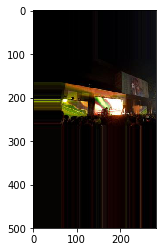

In [7]:
plt.imshow(images[62300])